<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Transformación Logaritmico Recíproco </font> </center>

La transformación de variables numéricas es una técnica fundamental en el preprocesamiento de datos. Permite modificar la distribución de las variables para mejorar la relación con el modelo, reducir la asimetría, estabilizar la varianza y cumplir supuestos estadísticos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
df=pd.DataFrame(data=housing.data,columns=housing.feature_names)
df[housing.target_names[0]]=housing.target

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


# Transformación logarítmica

Pensemos un momento en los logaritmos decimales (base 10). En la escala logarítmica hay la misma distancia entre 1 y 10 que entre 10 y 100 y que entre 100 y 1000. ¿Qué quiere decir esto?. Pues que si transformamos cada variable en su logaritmo, los valores entre 1 y 10 se expandirán, mientras que los más altos se comprimirán. Por eso la transformación logarítmica es útil para transformar distribuciones con sesgo positivo (con cola más larga hacia la derecha): la parte izquierda se expandirá, mientras que la derecha se comprimirá, favoreciendo que la curva resultante se ajuste mejor a una normal.


$$ X_{log} = \log(X) $$

- Reduce la asimetría positiva (colas largas a la derecha).
- Solo se aplica a valores positivos.

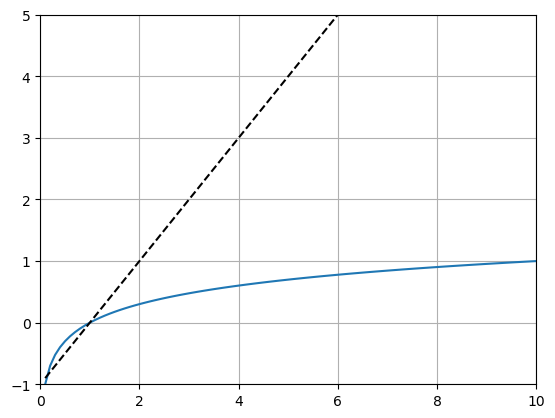

In [3]:
# Gráfica de X vs X'
x=np.linspace(0.1,10,100)
xp=np.log10(x)
plt.plot(x,xp)
plt.plot(x,x-1,'--k')
plt.axis([0,10,-1,5])
plt.grid()

Esta transformación logarítmica solo vale para números mayores que cero, aunque si tenemos una distribución con valores negativos podríamos **sumar una constante a cada valor** para que fuese mayor que cero antes de calcular su logaritmo. Cuando la nueva curva se ajusta a la campana se dice que sigue una distribución lognormal.

In [5]:
#restar el valor minimo de cada columna y sumarle uno para calcular después el logaritmo
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [6]:
df - df.min() + 1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.8253,41.0,7.137973,1.690476,320.0,2.863248,6.34,3.12,5.37601
1,8.8015,21.0,6.391983,1.638547,2399.0,2.417534,6.32,3.13,4.43501
2,7.7575,52.0,8.441982,1.740113,494.0,3.109952,6.31,3.11,4.37101
3,6.1432,52.0,5.971198,1.739726,556.0,2.855638,6.31,3.10,4.26301
4,4.3463,52.0,6.435699,1.747748,563.0,2.489159,6.31,3.10,4.27201
...,...,...,...,...,...,...,...,...,...
20635,2.0604,25.0,5.199301,1.800000,843.0,2.868298,7.94,4.26,1.63101
20636,3.0569,18.0,6.267881,1.982456,354.0,3.430499,7.95,4.14,1.62101
20637,2.2001,17.0,5.359389,1.786759,1005.0,2.633327,7.89,4.13,1.77301
20638,2.3673,18.0,5.483359,1.838586,739.0,2.430901,7.89,4.03,1.69701


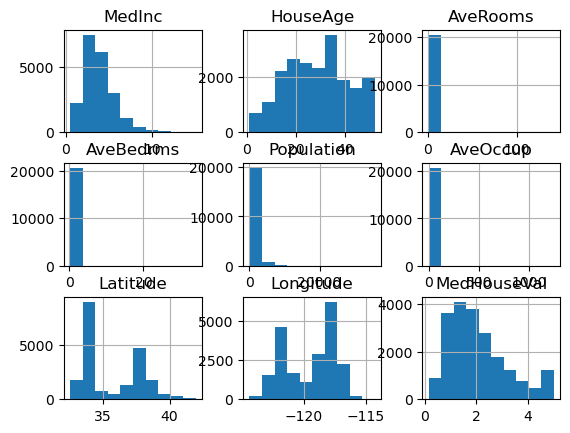

In [9]:
df.hist();

In [7]:
#df_log=df.copy()
df_log=np.log10(df-df.min()+1)
df_log

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0.945729,1.612784,0.853575,0.228009,2.505150,0.456859,0.802089,0.494155,0.730460
1,0.944557,1.322219,0.805636,0.214459,3.380030,0.383373,0.800717,0.495544,0.646895
2,0.889722,1.716003,0.926444,0.240577,2.693727,0.492754,0.800029,0.492760,0.640582
3,0.788395,1.716003,0.776061,0.240481,2.745075,0.455703,0.800029,0.491362,0.629716
4,0.638120,1.716003,0.808596,0.242479,2.750508,0.396053,0.800029,0.491362,0.630632
...,...,...,...,...,...,...,...,...,...
20635,0.313952,1.397940,0.715945,0.255273,2.925828,0.457624,0.899821,0.629410,0.212457
20636,0.485281,1.255273,0.797121,0.297204,2.549003,0.535357,0.900367,0.617000,0.209786
20637,0.342442,1.230449,0.729115,0.252066,3.002166,0.420505,0.897077,0.615950,0.248711
20638,0.374253,1.255273,0.739047,0.264484,2.868644,0.385767,0.897077,0.605305,0.229684


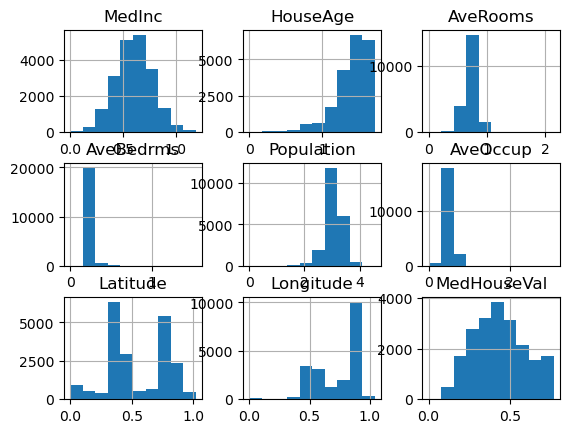

In [11]:
df_log.hist();


In [12]:
#Obtener el sesgo
sesgo=df.skew()
sesgo

MedInc          1.646657
HouseAge        0.060331
AveRooms       20.697869
AveBedrms      31.316956
Population      4.935858
AveOccup       97.639561
Latitude        0.465953
Longitude      -0.297801
MedHouseVal     0.977763
dtype: float64

In [13]:
sesgo_log=df_log.skew()
sesgo_log

MedInc         0.078282
HouseAge      -1.289170
AveRooms       0.959245
AveBedrms      8.298256
Population    -1.140433
AveOccup       2.662098
Latitude      -0.080214
Longitude     -0.745362
MedHouseVal    0.237146
dtype: float64

# Transformación recíproca

En ocasiones, si la distribución está muy sesgada, puede hacerse la transformación recíproca, más potente y que produce un efecto similar a la logarítmica. Otra tercera posibilidad, menos potente que la logarítmica, es transformar calculando la raíz cuadrada de cada valor.

Convierte una variable $X$ en $1/X$.

$$ X_{rec} = \frac{1}{X} $$

- Reduce la asimetría positiva.
- No se puede aplicar si hay ceros.

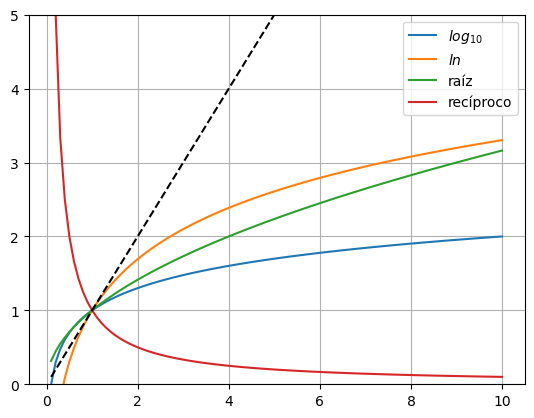

In [14]:
# Gráfica X vs X'
plt.plot(x,xp+1,label='$log_{10}$')
plt.plot(x,np.log(x)+1,label='$ln$')
plt.plot(x,np.sqrt(x),label='raíz')
plt.plot(x,1/x,label='recíproco')
plt.plot(x,x,'--k')
plt.ylim([0,5])
plt.legend()
plt.grid()

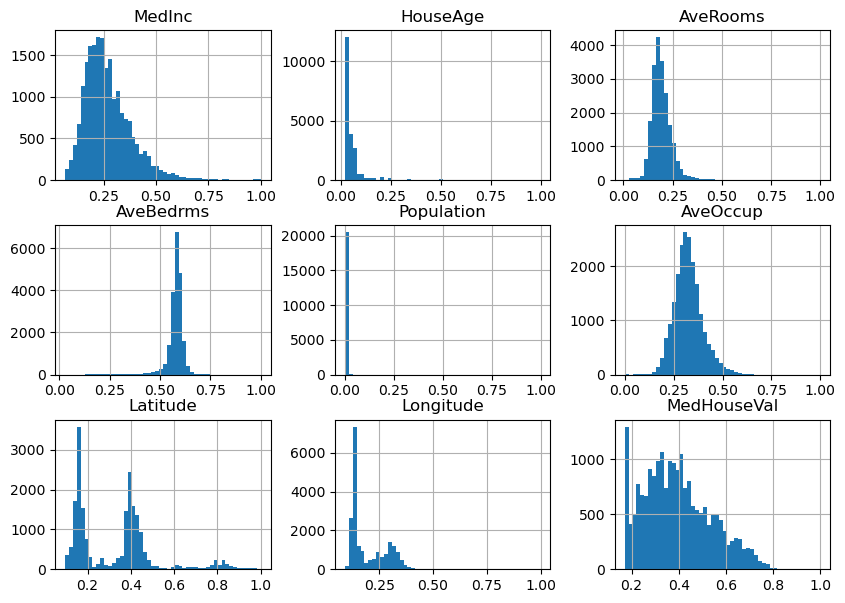

In [15]:
#Histograma de la transformación reciproca
df_r=1/(df-df.min()+1)
H=df_r.hist(figsize=(10,7),bins=50)

In [16]:
sesgo

MedInc          1.646657
HouseAge        0.060331
AveRooms       20.697869
AveBedrms      31.316956
Population      4.935858
AveOccup       97.639561
Latitude        0.465953
Longitude      -0.297801
MedHouseVal     0.977763
dtype: float64

In [17]:
sesgo_log

MedInc         0.078282
HouseAge      -1.289170
AveRooms       0.959245
AveBedrms      8.298256
Population    -1.140433
AveOccup       2.662098
Latitude      -0.080214
Longitude     -0.745362
MedHouseVal    0.237146
dtype: float64

In [18]:
sesgo_r=df_r.skew()
sesgo_r

MedInc          1.329928
HouseAge        5.719626
AveRooms        1.864921
AveBedrms      -3.911728
Population     80.838678
AveOccup        0.612341
Latitude        1.097306
Longitude       2.185543
MedHouseVal     0.507905
dtype: float64

# Ejemplos con Regresión Lineal

In [19]:
#Qué trnasformación utilizar?
idx_trans = np.argmin((np.abs(sesgo), np.abs(sesgo_log), np.abs(sesgo_r)), axis=0)
idx_trans

array([1, 0, 1, 2, 1, 2, 1, 0, 1], dtype=int64)

In [20]:
# Aplicamos logaritmo a las variables 0,2,4,6 y 8.
# Recíproco a las variables 3 y 5.
# Y ninguna transformación a las variables 1 y 7
#
transformacion = (lambda x:x, 
                 lambda x:np.log10(x-x.min() + 1),
                 lambda x: 1/(x-x.min() + 1))
df_t = df.copy()


In [21]:
for i,x in enumerate(df.columns):
    df_t[x] = transformacion[idx_trans[i]](df[x])
df_t

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0.945729,41.0,0.853575,0.591549,2.505150,0.349254,0.802089,-122.23,0.730460
1,0.944557,21.0,0.805636,0.610297,3.380030,0.413645,0.800717,-122.22,0.646895
2,0.889722,52.0,0.926444,0.574675,2.693727,0.321548,0.800029,-122.24,0.640582
3,0.788395,52.0,0.776061,0.574803,2.745075,0.350185,0.800029,-122.25,0.629716
4,0.638120,52.0,0.808596,0.572165,2.750508,0.401742,0.800029,-122.25,0.630632
...,...,...,...,...,...,...,...,...,...
20635,0.313952,25.0,0.715945,0.555556,2.925828,0.348639,0.899821,-121.09,0.212457
20636,0.485281,18.0,0.797121,0.504425,2.549003,0.291503,0.900367,-121.21,0.209786
20637,0.342442,17.0,0.729115,0.559673,3.002166,0.379748,0.897077,-121.22,0.248711
20638,0.374253,18.0,0.739047,0.543896,2.868644,0.411370,0.897077,-121.32,0.229684


In [22]:
df_t.skew()

MedInc         0.078282
HouseAge       0.060331
AveRooms       0.959245
AveBedrms     -3.911728
Population    -1.140433
AveOccup       0.612341
Latitude      -0.080214
Longitude     -0.297801
MedHouseVal    0.237146
dtype: float64

In [24]:
#Regresion lineal multiple con los datos sin transformar
y = df.MedHouseVal
X = df.drop(columns='MedHouseVal')
lin = LinearRegression()
lin.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


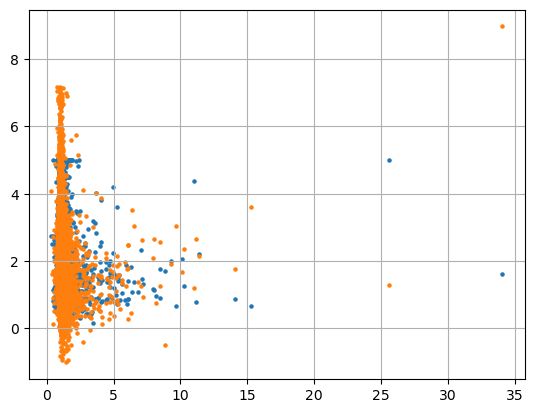

In [28]:
#Visualización de la regresión datos originales
prediccion=lin.predict(X)
plt.scatter(df['AveBedrms'], y, label='MedHouseVal', s=5)
plt.scatter(df['AveBedrms'], prediccion, label='prediccion', s=5)
plt.grid()

In [29]:
prediccion

array([4.13164983, 3.97660644, 3.67657094, ..., 0.17125141, 0.31910524,
       0.51580363])

In [30]:
#Regresion lineal multiple con los datos transformados
y_t = df_t.MedHouseVal
X_t = df_t.drop(columns='MedHouseVal')
lin_t = LinearRegression()
lin_t.fit(X_t,y_t)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


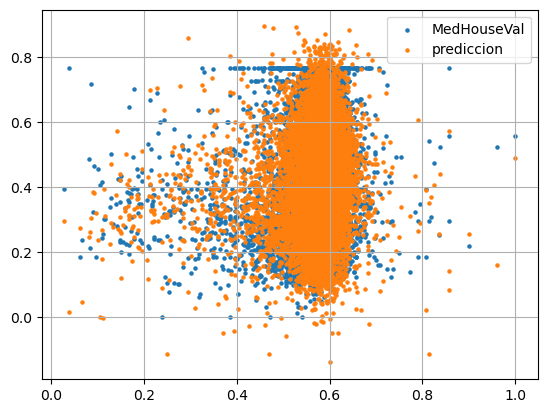

In [36]:
#Visualización de la regresión datos transformados
prediccion_t=lin_t.predict(X_t)
plt.scatter(df_t['AveBedrms'], y_t, label='MedHouseVal', s=5)
plt.scatter(df_t['AveBedrms'], prediccion_t, label='prediccion', s=5)
plt.legend()
plt.grid()

In [34]:
idx_trans[-1]# Se hizo la transformacion con log10 para la var de salida MedHouseVal


1

In [39]:
prediccion_t_inv = 10**(prediccion_t) + y.min() - 1
prediccion_t_inv

array([3.917502  , 4.04689235, 3.49814868, ..., 0.66236692, 0.8357474 ,
       0.96607859])

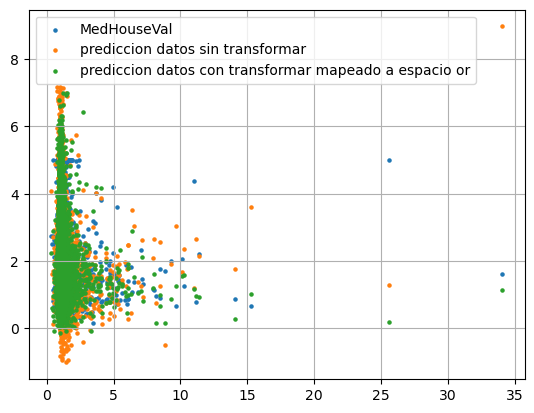

In [41]:
#Visualización de los datos transformados vs sin transformar
#Visualización de la regresión datos originales
prediccion=lin.predict(X)
plt.scatter(df['AveBedrms'], y, label='MedHouseVal', s=5)
plt.scatter(df['AveBedrms'], prediccion, label='prediccion datos sin transformar', s=5)
plt.scatter(df['AveBedrms'], prediccion_t_inv, label='prediccion datos con transformar mapeado a espacio or', s=5)
plt.legend()
plt.grid()

## Ejemplo Regresión para una variable

In [42]:
# Regresión para una variable
#
df = pd.read_csv('regresion.csv')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1000 non-null   float64
 1   y       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [44]:
df

,x,y
0,0.100000,1.932916
1,0.101001,2.242087
2,0.102002,2.022414
3,0.103003,1.692315
4,0.104004,1.672025
...,...,...
995,1.095996,4.563710
996,1.096997,6.415678
997,1.097998,6.760265
998,1.098999,5.750018


In [45]:
df.skew()

x    0.000000
y    0.608961
dtype: float64

array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>]],
      dtype=object)

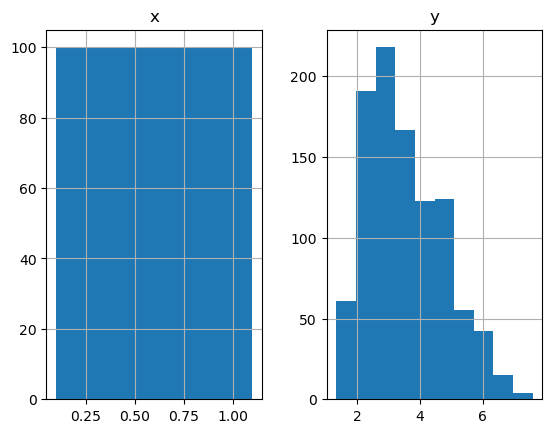

In [46]:
df.hist()

**Qué transformación elegir? (t_log, t_r)**

In [53]:
y =df.y - df.y.min() +1
sesgo = (np.abs(np.log10(y).skew()), np.abs((1/y).skew()))
sesgo

(0.1592270087925433, 1.0805166141039333)

<Axes: >

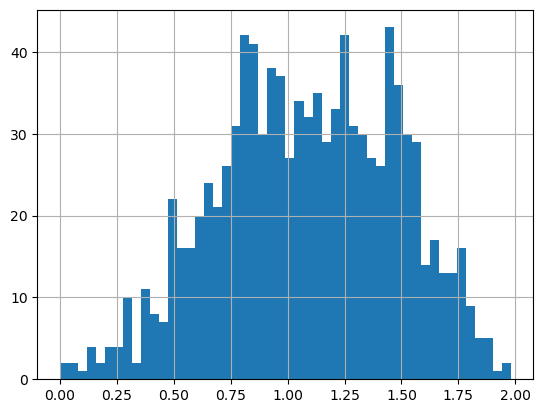

In [54]:
df_t = df.copy()
df_t['y'] = np.log(y)
df_t.y.hist(bins=50)

In [55]:
#Reg Lineal con los datos sin transformar
X = df[['x']]
y = df[['y']]
lin = LinearRegression()
lin.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [56]:
#Reg Lineal con los datos transformados
X_t = df_t[['x']]
y_t = df_t[['y']]
lin_t = LinearRegression()
lin_t.fit(X_t,y_t)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


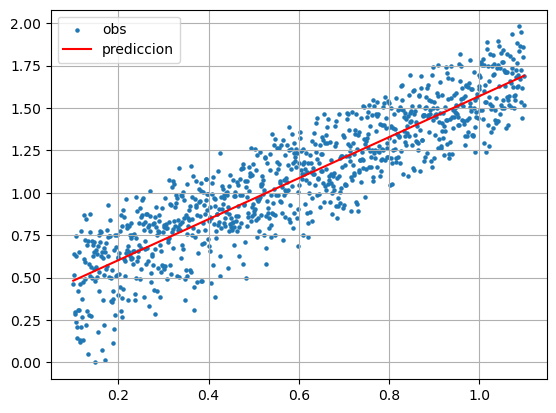

In [58]:
# Gráfica de los datos transformados
plt.scatter(df_t['x'], df_t['y'], s=5, label='obs')
plt.plot(df_t['x'], lin_t.predict(df_t[['x']]), 'r', label='prediccion')
plt.legend()
plt.grid()

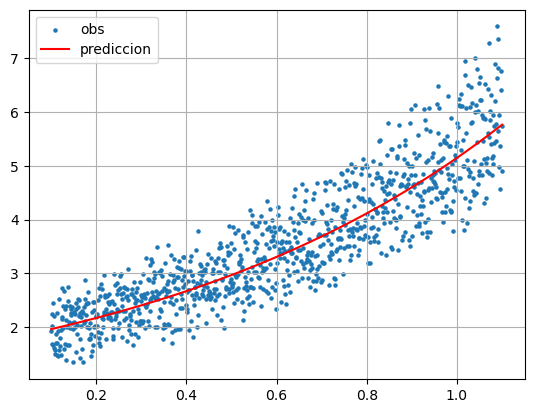

In [63]:
# Gráfica de los datos transformados
plt.scatter(df['x'], df['y'], s=5, label='obs')
f = np.exp(lin_t.predict(df[['x']])) + df.y.min() - 1
plt.plot(df['x'], f, 'r', label='prediccion')
plt.legend()
plt.grid()

In [ ]:
# Gráfica de los datos destransformados


## Resumen

- **Logarítmica y recíproca:** Útiles para reducir asimetría positiva. Solo para valores positivos.

**Ventajas:** Reduce la asimetría positiva, estabiliza la varianza, facilita la interpretación de los resultados en términos de porcentajes.

**Desventajas:** No se puede aplicar a datos con valores negativos o cero, puede exagerar las diferencias entre valores pequeños.